загружаем датасет, выводим его формат, типы данных, 5 первых строк и число нулевых значений каждого столбца

In [1]:
import pandas as pd

data = pd.read_csv(R"C:\Users\gavri\ML\datasets\titanic\train.csv")
print(data.shape)
print(data.dtypes)
print(data.head(5))
print(data.isnull().sum())

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            

импортируем библиотеки для визуализации - seaborn и pyplot
с помощью figure создаем базовое пространство, histplot подгружает в него данные из датафрейма, титл создает легенду для графика, а хлабел и улабел отвечают за названия осей. грид добавляет на график сетку а show выводит полученный график на экран

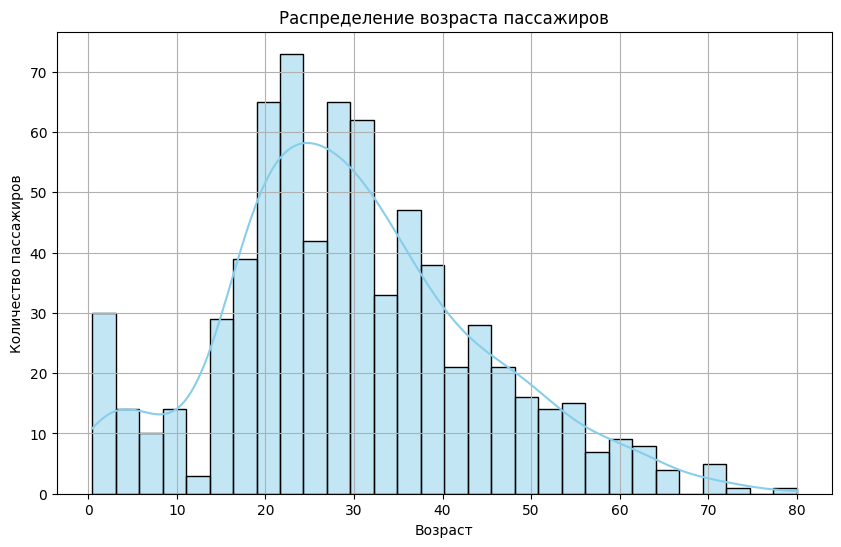

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.grid(True)
plt.show()

заполняем пропущенные значения колонки возраст его медианным значением

In [3]:
data['Age'] = data['Age'].fillna(data['Age'].median())

print(data['Age'].isnull().sum())

0


In [5]:
проверяем, что Nan возрастов не осталось

SyntaxError: invalid syntax (3713379354.py, line 1)

In [4]:
print(data['Age'].isnull().sum())        # количество NaN
print(len(data['Age']))                  # всего строк
print(data['Age'].dropna().head())       # что там вообще не NaN


0
891
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [5]:
с помощью drop удаляем ненужные нам признаки такие как айди пассажира, его имя билет и кабина

SyntaxError: invalid syntax (218012842.py, line 1)

In [6]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
С помощью LabelEncoder преобразуем строковые данные в числовые для удобства настройки модели

SyntaxError: invalid syntax (1627830978.py, line 1)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


с помощью гетдаммис проводим onehot кодировку, однако изза drop_first у меня пропал один из признаков(чат гпт даун), ладно пробуем так

In [9]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


с помощью minmaxscaler нормируем возраст и цену билета в промежуток [0, 1]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,0.271174,1,0,0.014151,False,True
1,1,1,0,0.472229,1,0,0.139136,False,False
2,1,3,0,0.321438,0,0,0.015469,False,True
3,1,1,0,0.434531,1,0,0.103644,False,True
4,0,3,1,0.434531,0,0,0.015713,False,True


за х принимаем матрицу признаков без колонки "выжил", за у - признак "выжил"

In [ ]:
xtrain = data.drop("Survived", axis=1)
ytrain = data["Survived"]


обучаем модель логистической регрессии, в которой будет максимум 1000 итераций

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x, y)

из библиотеки скачиваем метрику точности и проверяем на ней модель( на тренировочном датасете, данные будут завышены). Даже так получили всего 80%, что не есть хорошо, хотя и модель конечно была использована базовее некуда

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x)
print("Accuracy: ", accuracy_score(y, y_pred))
print("Report: ", classification_report(y, y_pred))

с помощью ыиборна строим матрицу ошибок

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Предсказание")
plt.ylabel("Реальность")
plt.title("матрица ошибок")
plt.show()

из матрицы ошибок видим что FN ошибок больше чем FP, однако в процентном соотношении кстати наоборот

проверим признаки на их влияние в модели


In [ ]:
fimp = pd.Series(model.coef_[0], index=x.columns)
fimp.sort_values(ascending=False).plot(kind="bar", title="веса признаков")

как итог, сильнее всего на выживаемость влияли пол, возраст и класс пассажира(что логично, ибо спасают всегда женщин детей и богатых)

удаляем parch, чета он неважный

In [ ]:
x = x.drop(columns=['Parch'])

снова обучаем модель и проверям метрики

In [ ]:
model.fit(x, y)
y_pred = model.predict(x)
print("Accuracy: ", accuracy_score(y, y_pred))
print("Report: ", classification_report(y, y_pred))

Ну нихрена не изменилось и ладно

In [ ]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Предсказание")
plt.ylabel("Реальность")
plt.title("матрица ошибок")
plt.show()

матрица ошибок практически идентичная, удаление признака не повлияло


используем кросс-валидацию

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print("Accuracy на каждом фолде :", scores)
print("средняя Accuracy модели: ", scores.mean())

в целом модель стабильна, однако accuracy конечно не очень

In [ ]:
с помощью сетки подбираем лучшие параметры для модели

In [ ]:
from sklearn.model_selection import GridSearchCV

#Задаем сетку параметров

grid = {
    'C':[0.01, 0.1, 1, 10, 100],
    'penalty':['l1', 'l2'], 
    'solver':['liblinear']}

logreg = LogisticRegression(max_iter=1000)

grsearch = GridSearchCV(logreg, grid, cv=5, scoring='accuracy')
grsearch.fit(x, y)

print("Лучшие параметры: ", grsearch.best_params_)
print("Лучшая accuracy: ", grsearch.best_score_)

ну линейная регрессия для лохов, никак не выросла метрика практически что не делай

снова рисуем матрицу ошибок чтобы понять где чаще ошибаемся

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = grsearch.predict(x)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y, y_pred))


всё сильно плохо с полнотой выявления 1 класса(выжил),FN большевата, убивает тех кто выжил

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(x, y)

y_pred = model.predict(x)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y, y_pred))

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=x.columns, class_names=['умер', 'выжил'], filled=True)
plt.show()

NameError: name 'x' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

grid = {
    'n_estimators':[100, 150, 200, 220], 
    'max_depth':[2, 3, 4]}

forest = RandomForestClassifier(random_state=42)

grsearch = GridSearchCV(forest, grid, cv=5, scoring='accuracy')

grsearch.fit(x, y)
print("Лучшие параметры: ", grsearch.best_params_)
print("Лучшая accuracy: ", grsearch.best_score_)

In [ ]:
y_pred = grsearch.predict(x)

cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
model = grsearch.best_estimator_

In [ ]:
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=x.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False), 
            y=feat_importances.sort_values(ascending=False).index)
plt.title("Важность признаков")
plt.xlabel("Значение важности")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()

In [7]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=500,
    learning_rate = 0.1,
    depth=6,
    verbose=100)
model.fit(x, y)
y_pred = model.predict(x)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

NameError: name 'x' is not defined

In [ ]:
data = pd.read_csv(R"C:\Users\gavri\ML\datasets\titanic\test.csv")
data['Age'] = data['Age'].fillna(data['Age'].median())
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
scaler = MinMaxScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


In [ ]:
data.info()
data.head()

In [ ]:
xtest = data
ydata = pd.read_csv(R"C:\Users\gavri\ML\datasets\titanic\gender_submission.csv")

In [ ]:
ytest = ydata["Survived"]

In [ ]:
y_pred = model.predict(x)

print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

In [ ]:
model = CatBoostClassifier(verbose=0)
grid = {
    'depth':[2, 3, 4, 5],#глубина деревьев
    'learning_rate':[0.03, 0.1, 0.2],#скорость обучения (лямбда перед градиентом)
    'iterations':[100, 150, 200, 220, 300],#количество вычислений градиента
    'l2_leaf_reg':[1, 3, 5, 10]#Коэффициент ридж регуляризации
}
grsearch = GridSearchCV(model, grid, cv=4, scoring='accuracy')
grsearch.fit(xtrain, ytrain)

print("Best params:", grsearch.best_params_)
print("Best test accuracy:", grsearch.score(xtest, ytest))

In [8]:
model = grsearch.best_estimator_
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=x.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False), 
            y=feat_importances.sort_values(ascending=False).index)
plt.title("Важность признаков")
plt.xlabel("Значение важности")
plt.ylabel("Признак")
plt.tight_layout()
plt.show()

NameError: name 'grsearch' is not defined

In [1]:
y_pred = model.predict(x)
cm = confusion_matrix(ytest, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

NameError: name 'model' is not defined